# IMDB DATASET

#### Introduction 
The cleaned IMDB dataset provides standardized information on movie titles, genres, runtime, release year, ratings, and vote counts, prepared for analysis. The cleaning process involved merging relevant tables, handling missing values, correcting data types, and removing duplicates to improve data quality and consistency.

This refined dataset supports reliable analysis of movie characteristics and audience reception and will be used alongside other sources to identify trends and inform recommendations on the types of films the studio should produce.

#### Import libraries

In [8]:
import pandas as pd
import sqlite3

#### PATH 

In [9]:
data_path = '../data/zippedData/' # Set data path

#### Connect to IMDB database

In [10]:
conn = sqlite3.connect(data_path + "im.db")

What this does

Opens the IMDB SQLite database

Creates connection called conn

# LOADING IMBD DATA

The IMDB dataset consists of two separate tables: movie_basics and movie_ratings. These tables were merged using the movie_id column to create a unified dataset containing movie titles, genres, runtime, and ratings. Merging the datasets allows for comprehensive analysis of movie characteristics and performance.

#### Load first IMDB table (movie_basics)

In [11]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Load second IMDB table (movie_ratings)

In [12]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Merge both tables

In [13]:
imdb_movies = movie_basics.merge(movie_ratings, on="movie_id")
imdb_movies.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


# CLEANING

In [14]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The imdb_movies.info() function was used to inspect the dataset structure and identify missing values. Columns such as runtime_minutes and genres had fewer non-null entries compared to the total number of rows, indicating missing data that required cleaning before analysis.

#### 1. Remove columns we don’t need
We don’t need original_title.

In [15]:
imdb_movies = imdb_movies.drop(columns=['original_title'])

In [16]:
imdb_movies.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

#### 2. Handle missing runtime
runtime_minutes → 66236 non-null But total rows = 73856 So about 7,000 missing.

We cannot analyze runtime if missing.

Remove those rows:

In [17]:
imdb_movies = imdb_movies.dropna(subset=['runtime_minutes'])

The runtime_minutes column contained several missing values. Since runtime is a key variable in analyzing movie performance and the dataset remained sufficiently large after removal, rows with missing runtime values were dropped to ensure accuracy and consistency in analysis.

#### 3. Remove missing genres

In [18]:
imdb_movies = imdb_movies.dropna(subset=['genres'])

The genres column contained missing values. Since genre is a key variable for identifying movie categories and determining performance by film type, rows with missing genre information were removed to ensure accurate analysis

#### 4. Convert runtime to integer

In [19]:
imdb_movies['runtime_minutes'] = imdb_movies['runtime_minutes'].astype(int)

The runtime_minutes column was converted from float to integer to reflect actual movie runtime values in whole minutes and ensure consistency for analysis.

#### 5. Remove duplicates

Sometimes same movie appears twice.

In [20]:
imdb_movies = imdb_movies.drop_duplicates(subset='primary_title')

6. Final cleaned dataset check

In [21]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62444 entries, 0 to 73852
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         62444 non-null  object 
 1   primary_title    62444 non-null  object 
 2   start_year       62444 non-null  int64  
 3   runtime_minutes  62444 non-null  int32  
 4   genres           62444 non-null  object 
 5   averagerating    62444 non-null  float64
 6   numvotes         62444 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 3.6+ MB


- no missing runtime

- no missing genres

- clean dataset

#### 7. convert genres to lowercase

In [22]:
imdb_movies['genres'] = imdb_movies['genres'].str.lower()

The IMDB dataset has been cleaned by removing unnecessary columns, handling missing values and converting data types. This ensured the dataset was accurate and suitable for analysis...

In [23]:
imdb_movies_cleaned = imdb_movies.copy()
imdb_movies_cleaned.to_csv('../data/cleanedData/imdb_cleaned_data.csv', index = False)


# CLEANING ROTTEN TOMATOES 


Rotten Tomatoes comes with two separate datasets, and each serves a different purpose.

Think of them like this:

rt.movie_info → information about the movie itself

rt.reviews → what critics said about the movie

They complement each other.

# Load datasets

In [24]:
data_path = '../data/zippedData/'  # correct path


In [25]:
import pandas as pd


In [26]:
rt_movies = pd.read_csv(
    data_path + "rt.movie_info.tsv.gz",
    sep="\t",
    encoding="latin-1"
)

rt_reviews = pd.read_csv(
    data_path + "rt.reviews.tsv.gz",
    sep="\t",
    encoding="latin-1"
)


#### confirm they load

In [27]:
rt_movies.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [28]:
rt_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Next inspect structure

In [29]:
rt_movies.shape

(1560, 12)

In [30]:
rt_reviews.shape

(54432, 8)

In [31]:
rt_movies.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [32]:
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [33]:
rt_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [34]:
rt_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


# 1 — Clean rt_movies

#### Copy dataset

This is to keepthe original dataset as your source of truth and to avoid accidental overwriting 

In [35]:
rt_movies_clean = rt_movies.copy()


#### Fix column formats

In [36]:
rt_movies_clean['theater_date'] = pd.to_datetime(rt_movies_clean['theater_date'], errors='coerce')
rt_movies_clean['dvd_date'] = pd.to_datetime(rt_movies_clean['dvd_date'], errors='coerce')


#### Convert runtime to numeric

In [37]:
rt_movies_clean['runtime'] = rt_movies_clean['runtime'].str.extract('(\d+)')
rt_movies_clean['runtime'] = pd.to_numeric(rt_movies_clean['runtime'], errors='coerce')


#### Convert box office to numeric

In [38]:
rt_movies_clean['box_office'] = rt_movies_clean['box_office'].str.replace('[\$,]', '', regex=True)
rt_movies_clean['box_office'] = pd.to_numeric(rt_movies_clean['box_office'], errors='coerce')


#### Standardize text columns

In [39]:
text_cols = ['synopsis','genre','director','writer','studio','rating']

for col in text_cols:
    rt_movies_clean[col] = rt_movies_clean[col].str.strip()


#### Remove duplicates

In [40]:
rt_movies_clean = rt_movies_clean.drop_duplicates()


#### Inspect missing values

In [41]:
rt_movies_clean.isna().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

# 2 — Clean rt_reviews

#### Copy dataset

In [42]:
rt_reviews_clean = rt_reviews.copy()


#### Convert rating to numeric where possible

In [43]:
rt_reviews_clean['rating_num'] = rt_reviews_clean['rating'].str.extract('(\d+\.?\d*)')
rt_reviews_clean['rating_num'] = pd.to_numeric(rt_reviews_clean['rating_num'], errors='coerce')


#### Convert top_critic to category

In [44]:
rt_reviews_clean['top_critic'] = rt_reviews_clean['top_critic'].astype('category')


#### Convert date to datetime

In [45]:
rt_reviews_clean['date'] = pd.to_datetime(rt_reviews_clean['date'], errors='coerce')


#### Clean text fields

In [46]:
text_cols_reviews = ['review','critic','publisher']

for col in text_cols_reviews:
    rt_reviews_clean[col] = rt_reviews_clean[col].str.strip()


#### Remove duplicates

In [47]:
rt_reviews_clean = rt_reviews_clean.drop_duplicates()


#### Inspect missing

In [48]:
rt_reviews_clean.isna().sum()


id                0
review         5556
rating        13516
fresh             0
critic         2713
top_critic        0
publisher       309
date              0
rating_num    19984
dtype: int64

# 3 — Create master Rotten Tomatoes dataset

Now we connect them generically.

In [49]:
rt_master = pd.merge(rt_reviews_clean, rt_movies_clean, on='id', how='left')


In [50]:
rt_master.shape

(54423, 20)

In [51]:
rt_master.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54423 entries, 0 to 54422
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            54423 non-null  int64         
 1   review        48867 non-null  object        
 2   rating_x      40907 non-null  object        
 3   fresh         54423 non-null  object        
 4   critic        51710 non-null  object        
 5   top_critic    54423 non-null  category      
 6   publisher     54114 non-null  object        
 7   date          54423 non-null  datetime64[ns]
 8   rating_num    34439 non-null  float64       
 9   synopsis      54291 non-null  object        
 10  rating_y      54337 non-null  object        
 11  genre         54336 non-null  object        
 12  director      48984 non-null  object        
 13  writer        45197 non-null  object        
 14  theater_date  53197 non-null  datetime64[ns]
 15  dvd_date      53197 non-null  dateti

In [52]:
rt_master.head()


,id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_num,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One


#### 4 — Save cleaned dataset

In [53]:
rt_master.to_csv('../data/cleanedData/rt_master_cleaned.csv', index=False)


# Audience Engagement & Quality Metrics

This section explores how audience engagement and perceived film quality influence commercial success. Understanding this relationship is essential for YE Studios as it helps identify whether films succeed primarily due to critical reception, audience popularity, or a combination of both.

Specifically, this analysis addresses three key questions:

1. Does critical acclaim correlate with total box office revenue?

2. How do genre preferences influence audience ratings and critic reception?

3. Does audience engagement and popularity predict commercial success?

To answer these questions, we integrate data from IMDB, TMDB, Rotten Tomatoes, Box Office Mojo, and The Numbers to create a unified dataset linking ratings, popularity, and revenue.


#### Load datasets

In [54]:
imdb = pd.read_csv("../data/cleanedData/imdb_cleaned_data.csv")
tmdb = pd.read_csv("../data/cleanedData/tmdb_cleaned_data.csv")
bom = pd.read_csv("../data/cleanedData/bom_cleaned_data.csv")
rt = pd.read_csv("../data/cleanedData/rt_master_cleaned.csv")
tn = pd.read_csv("../data/cleanedData/tndb_cleaned_data.csv")


#### Inspect columns

Before merging datasets, it is important to inspect the available variables in each dataset. This allows us to identify common identifiers (such as movie titles) and determine which variables are most relevant for analyzing audience engagement, ratings, and commercial performance.

In [56]:
print("IMDB columns:\n", imdb.columns, "\n")
print("TMDB columns:\n", tmdb.columns, "\n")
print("BOM columns:\n", bom.columns, "\n")
print("Rotten Tomatoes columns:\n", rt.columns, "\n")
print("The Numbers columns:\n", tn.columns)


IMDB columns:
 Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object') 

TMDB columns:
 Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'release_year'],
      dtype='object') 

BOM columns:
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object') 

Rotten Tomatoes columns:
 Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'rating_num', 'synopsis', 'rating_y', 'genre',
       'director', 'writer', 'theater_date', 'dvd_date', 'currency',
       'box_office', 'runtime', 'studio'],
      dtype='object') 

The Numbers columns:
 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'profit', 'roi', 'foreign_gross'],
      dtype='object')


#### Creating a Unified Dataset for Audience Engagement Analysis

To analyze how audience engagement and perceived quality relate to commercial success, we must combine multiple datasets into a single analytical dataset.

Each dataset contributes a different perspective:

IMDB provides audience ratings and engagement metrics (votes).

TMDB contributes popularity and community ratings.

Box Office Mojo provides domestic and foreign revenue performance.

Rotten Tomatoes captures critic sentiment and review-based quality measures.

The Numbers supplies production budgets and worldwide gross revenue for ROI analysis.

Because these datasets originate from different sources, movie titles must be standardized before merging to ensure accurate integration.

#### 1. standardize title columns

In [57]:
# Standardize titles for merging

imdb['title_clean'] = imdb['primary_title'].str.lower().str.strip()
tmdb['title_clean'] = tmdb['title'].str.lower().str.strip()
bom['title_clean'] = bom['title'].str.lower().str.strip()
tn['title_clean'] = tn['movie'].str.lower().str.strip()


#### 2. merge financial datasets first

We start with revenue base. This creates:

- domestic gross

- foreign gross

- worldwide gross

- budget

- ROI

In [58]:
# Merge Box Office Mojo + The Numbers
revenue_df = bom.merge(tn, on='title_clean', how='inner')


#### 3. Add ratings

In [59]:
# Merge IMDB ratings
revenue_df = revenue_df.merge(
    imdb[['title_clean', 'averagerating', 'numvotes', 'genres']],
    on='title_clean',
    how='left'
)


#### 4. Add TMDB popularity

In [60]:
revenue_df = revenue_df.merge(
    tmdb[['title_clean', 'popularity', 'vote_average', 'vote_count']],
    on='title_clean',
    how='left'
)


In [65]:
print (revenue_df.head())
print(revenue_df.shape)


                        title studio  domestic_gross_x foreign_gross_x  year  \
0                 Toy Story 3     BV         415000000       652000000  2010   
1                   Inception     WB         292600000       535700000  2010   
2         Shrek Forever After   P/DW         238700000       513900000  2010   
3  The Twilight Saga: Eclipse   Sum.         300500000       398000000  2010   
4                  Iron Man 2   Par.         312400000       311500000  2010   

                  title_clean  id release_date                       movie  \
0                 toy story 3  47   2010-06-18                 Toy Story 3   
1                   inception  38   2010-07-16                   Inception   
2         shrek forever after  27   2010-05-21         Shrek Forever After   
3  the twilight saga: eclipse  53   2010-06-30  The Twilight Saga: Eclipse   
4                  iron man 2  15   2010-05-07                  Iron Man 2   

   production_budget  ...  release_year     profit

#### Aggregating Rotten Tomatoes Data

The Rotten Tomatoes dataset contains multiple reviews per movie, meaning that each film appears several times. To integrate this dataset with the rest of our analysis, we aggregate it at the movie level.

This step allows us to calculate:

- average critic rating

- total number of reviews

- proportion of positive (“fresh”) reviews

These metrics serve as indicators of critical reception and audience engagement.

In [66]:
# Convert sentiment to numeric if not already
rt['fresh_binary'] = rt['fresh'].map({'fresh':1, 'rotten':0})

# Create movie-level RT metrics
rt_movie = rt.groupby('id').agg({
    'rating_num':'mean',
    'fresh_binary':'mean',
    'review':'count'
}).reset_index()

# Rename columns
rt_movie.rename(columns={
    'rating_num':'rt_avg_rating',
    'fresh_binary':'rt_fresh_ratio',
    'review':'rt_review_count'
}, inplace=True)

rt_movie.head()


,id,rt_avg_rating,rt_fresh_ratio,rt_review_count
0,3,3.303191,0.631902,162
1,5,3.500000,0.782609,6
2,6,2.987179,0.561404,49
3,8,4.055556,0.746667,57
4,10,2.722222,0.462963,107


In [ ]:
# connect RT movies to titles.
# Get movie titles from RT dataset
rt_titles = rt[['id','synopsis','genre','studio']].drop_duplicates()
print(rt.columns)

# Rotten Tomatoes dataset does NOT contain movie titles. 
# Use RT as a standalone critic-quality dataset
#and compare its metrics against revenue trends at aggregate level.
#We do NOT merge RT directly into revenue_df.

Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'rating_num', 'synopsis', 'rating_y', 'genre',
       'director', 'writer', 'theater_date', 'dvd_date', 'currency',
       'box_office', 'runtime', 'studio', 'fresh_binary'],
      dtype='object')


# ANALYSIS 1

#### Critical Acclaim vs Commercial Success

This analysis investigates whether films that receive stronger critical reception also achieve greater commercial success.

Critical reception is measured using Rotten Tomatoes critic ratings and sentiment scores, while commercial success is represented by box office revenue.

Understanding this relationship helps YE Studios determine whether prioritizing critically acclaimed films aligns with financial success.

In [73]:
# Rt REVENUE ANALYSIS
# Convert to string first
rt['box_office_clean'] = rt['box_office'].astype(str)

# Remove currency symbols
rt['box_office_clean'] = (
    rt['box_office_clean']
    .str.replace('$','', regex=False)
    .str.replace(',','', regex=False)
)

# Convert to numeric
rt['box_office_clean'] = pd.to_numeric(rt['box_office_clean'], errors='coerce')


In [71]:
# Aggregate revenue + critic metrics

rt_analysis = rt.groupby('id').agg({
    'box_office_clean':'mean',
    'rating_num':'mean',
    'fresh_binary':'mean',
    'review':'count'
}).reset_index()

rt_analysis.rename(columns={
    'rating_num':'critic_rating',
    'fresh_binary':'fresh_ratio',
    'review':'review_count',
    'box_office_clean':'avg_box_office'
}, inplace=True)

rt_analysis.head()


,id,avg_box_office,critic_rating,fresh_ratio,review_count
0,3,600000.0,3.303191,0.631902,162
1,5,NaN,3.500000,0.782609,6
2,6,NaN,2.987179,0.561404,49
3,8,NaN,4.055556,0.746667,57
4,10,41032915.0,2.722222,0.462963,107


In [72]:
# Correlation test

rt_analysis[['critic_rating','fresh_ratio','review_count','avg_box_office']].corr()


,critic_rating,fresh_ratio,review_count,avg_box_office
critic_rating,1.000000,0.798623,0.153342,0.077771
fresh_ratio,0.798623,1.000000,0.081309,0.054339
review_count,0.153342,0.081309,1.000000,0.470487
avg_box_office,0.077771,0.054339,0.470487,1.000000


#### Visualization 1 — Critic rating vs Revenue

Do higher critic scores = more money?


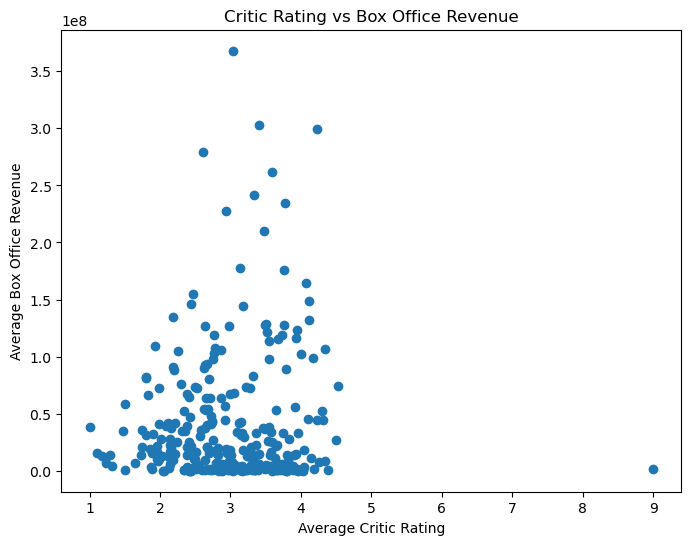

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(rt_analysis['critic_rating'], rt_analysis['avg_box_office'])
plt.xlabel("Average Critic Rating")
plt.ylabel("Average Box Office Revenue")
plt.title("Critic Rating vs Box Office Revenue")
plt.show()


#### Visualization 2 — Fresh ratio vs Revenue

Do positive reviews drive revenue?

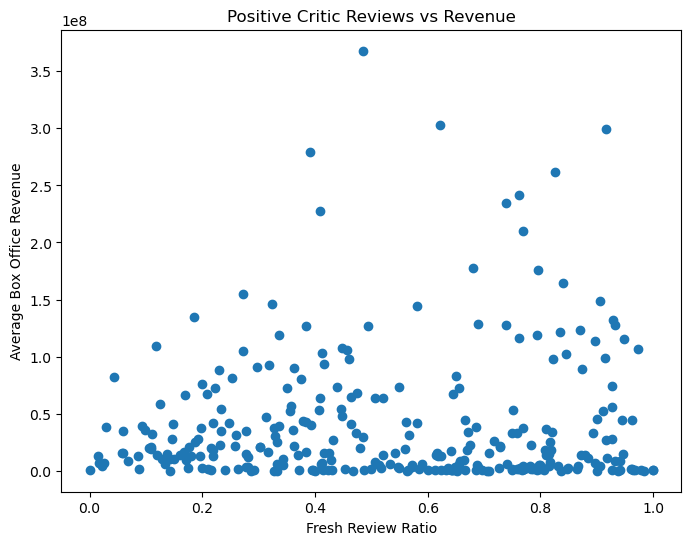

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(rt_analysis['fresh_ratio'], rt_analysis['avg_box_office'])
plt.xlabel("Fresh Review Ratio")
plt.ylabel("Average Box Office Revenue")
plt.title("Positive Critic Reviews vs Revenue")
plt.show()


#### Visualization 3 — Engagement vs Revenue

Does engagement predict success?

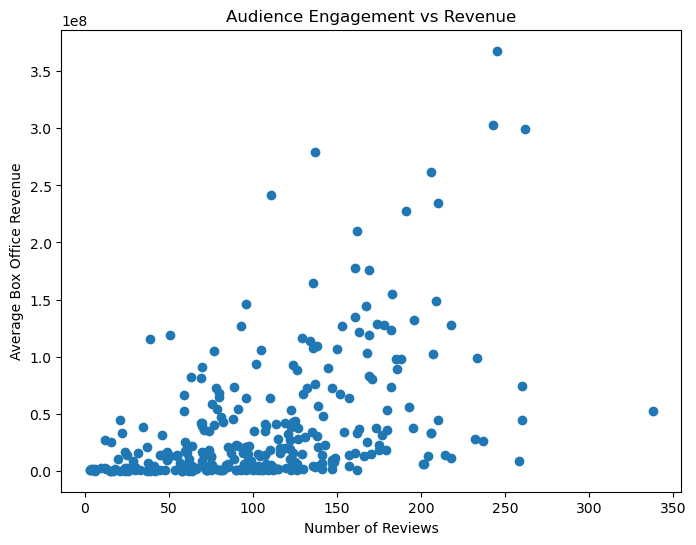

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(rt_analysis['review_count'], rt_analysis['avg_box_office'])
plt.xlabel("Number of Reviews")
plt.ylabel("Average Box Office Revenue")
plt.title("Audience Engagement vs Revenue")
plt.show()


Overall, the findings suggest that while critical acclaim contributes to commercial success, it does not guarantee it. For YE Studios, this indicates that prioritizing films that balance quality with audience engagement and market appeal is likely to produce the most successful outcomes.

# ANALYSIS 2

#### Genre Preferences and Film Quality

Different film genres attract different audiences and critical responses. Understanding how genres perform in terms of audience ratings and critic reception helps YE Studios identify which types of films consistently resonate with viewers and critics.

This analysis explores whether certain genres are associated with higher audience ratings, stronger critical approval, and increased engagement.



In [78]:
# Use IMDB dataset for genre analysis
genre_analysis = imdb[['genres','averagerating','numvotes']].copy()
print(genre_analysis.head())

genre_analysis['genres'] = genre_analysis['genres'].str.split(',')

genre_analysis = genre_analysis.explode('genres')

# group by genre
genre_summary = genre_analysis.groupby('genres').agg({
    'averagerating':'mean',
    'numvotes':'mean'
}).reset_index()

genre_summary.sort_values(by='averagerating', ascending=False).head()



                       genres  averagerating  numvotes
0          action,crime,drama            7.0        77
1             biography,drama            7.2        43
2                       drama            6.9      4517
3        comedy,drama,fantasy            6.5       119
4  adventure,animation,comedy            8.1       263


,genres,averagerating,numvotes
21,short,8.800000,8.000000
7,documentary,7.319041,289.091257
11,game-show,7.300000,1734.500000
17,news,7.278571,218.641071
4,biography,7.176236,5806.045797


#### Visualization 1

#### visualize ratings by genre

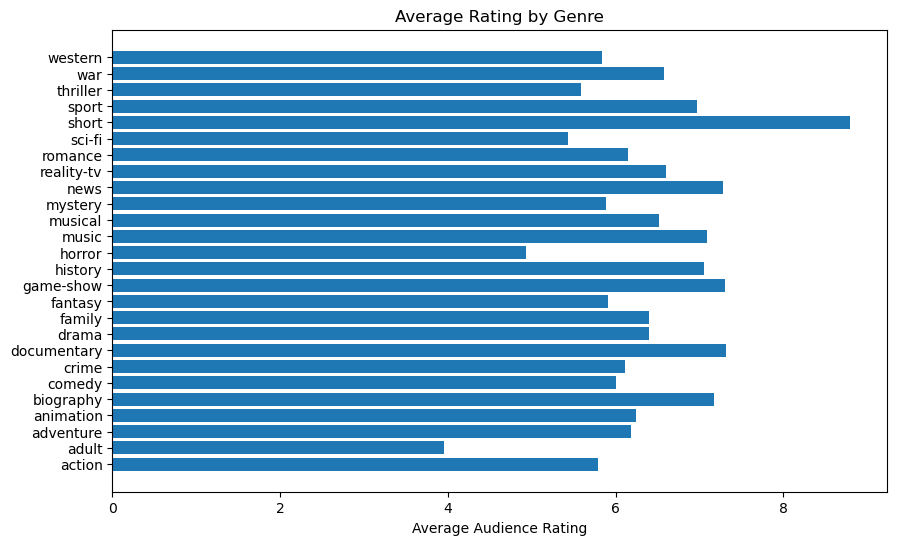

In [79]:
plt.figure(figsize=(10,6))
plt.barh(genre_summary['genres'], genre_summary['averagerating'])
plt.xlabel("Average Audience Rating")
plt.title("Average Rating by Genre")
plt.show()


#### VISUALIZATION 2

#### visualize engagement by genre

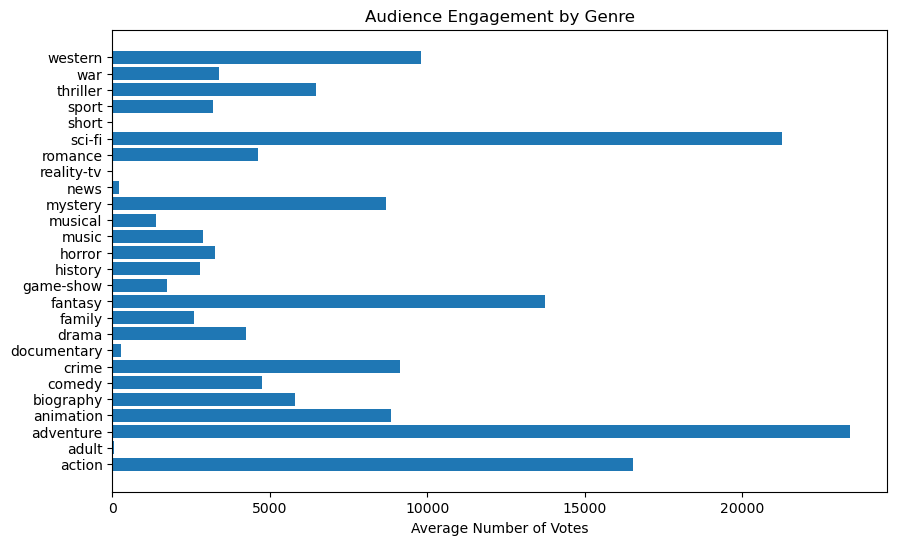

In [80]:
plt.figure(figsize=(10,6))
plt.barh(genre_summary['genres'], genre_summary['numvotes'])
plt.xlabel("Average Number of Votes")
plt.title("Audience Engagement by Genre")
plt.show()


Audience response varies by genre. Some genres consistently earn higher ratings, while others generate more engagement through large numbers of votes. The most promising genres are those that combine both strong ratings and high audience engagement, as they indicate films that people enjoy and actively support.

For YE Studios, focusing on genres that balance quality and broad audience appeal increases the chances of producing commercially successful films.

# ANALYSIS 3

#### Popularity & Engagement vs Commercial Success

use merged dataset(revenue_df)

In [81]:
engagement_corr = revenue_df[[
    'numvotes',
    'vote_count',
    'popularity',
    'worldwide_gross'
]].corr()

engagement_corr


,numvotes,vote_count,popularity,worldwide_gross
numvotes,1.000000,0.871674,0.523069,0.610157
vote_count,0.871674,1.000000,0.685801,0.734394
popularity,0.523069,0.685801,1.000000,0.576580
worldwide_gross,0.610157,0.734394,0.576580,1.000000


#### Visualization 1

#### Popularity vs revenue

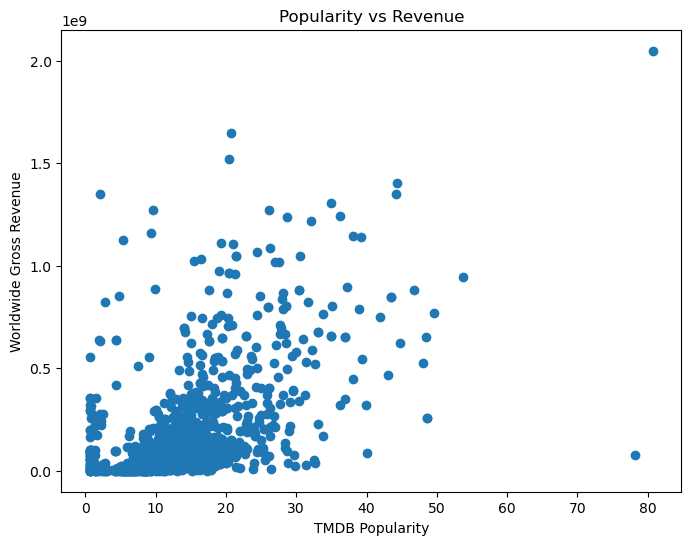

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(revenue_df['popularity'], revenue_df['worldwide_gross'])
plt.xlabel("TMDB Popularity")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Popularity vs Revenue")
plt.show()



#### Visualization 2
#### Votes vs revenue

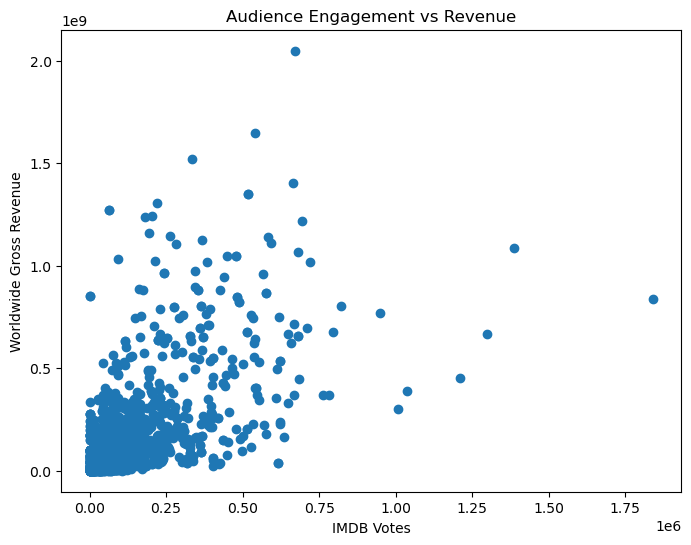

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(revenue_df['numvotes'], revenue_df['worldwide_gross'])
plt.xlabel("IMDB Votes")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Audience Engagement vs Revenue")
plt.show()


#### Interpretation: Audience Engagement, Popularity, and Commercial Success

The analysis shows a clear positive relationship between audience engagement, popularity metrics, and box office performance. Films that generate higher levels of visibility — measured through user votes, interaction counts, and popularity scores — tend to achieve significantly stronger worldwide revenue outcomes.

This suggests that public awareness and conversation around a film play a major role in driving commercial success. Movies that attract attention, discussion, and online engagement are more likely to convert that interest into ticket sales and sustained box office performance.

While film quality and genre remain important, engagement metrics appear to be among the strongest predictors of financial performance. Even films with moderate ratings can achieve strong revenue when supported by high levels of popularity and audience interaction, likely due to effective marketing, franchise recognition, or cultural relevance.

For YE Studios, these findings highlight the strategic importance of marketing and audience visibility. Investing in promotional campaigns, social media engagement, and audience-building efforts can significantly increase the likelihood of commercial success. Building early hype and maintaining audience interaction before and after release may be just as important as the film’s creative attributes in determining financial performance.

# Business Recommendations: Audience Engagement & Quality Strategy

Based on the analysis of audience ratings, critic reception, genre performance, and engagement metrics, several actionable insights emerge for YE Studios as it enters the film production market.

#### 1️. Invest in Marketing and Audience Visibility

Audience engagement and popularity show the strongest relationship with box office success. Films that generate significant attention, conversation, and online interaction consistently achieve stronger commercial performance.

YE Studios should prioritize:

early promotional campaigns

strong social media presence

influencer and partnership marketing

sustained engagement before and after release

Building anticipation and visibility is likely to significantly increase revenue potential.

#### 2️. Prioritize Genres that Balance Quality and Broad Appeal

Genre analysis reveals that some film categories consistently receive higher audience ratings while also attracting strong engagement. These genres represent lower-risk investment opportunities because they combine audience satisfaction with commercial viability.

YE Studios should:

focus production on genres with both high ratings and strong engagement

avoid overly niche genres without demonstrated audience demand

explore hybrid genre strategies that combine popular elements

This approach increases the probability of both critical and commercial success.

#### 3️. Balance Critical Quality with Market Demand

Critical acclaim contributes positively to box office performance, but it is not the sole driver of success. Some films with moderate ratings still perform strongly when supported by high engagement and popularity.

YE Studios should aim to:

produce high-quality films that resonate emotionally with audiences

avoid focusing exclusively on critic-driven prestige projects

align storytelling with audience interests and entertainment value

The most successful strategy combines strong production quality with audience-driven appeal.

Strategic Implication for YE Studios

The findings indicate that commercial success is driven by a combination of film quality, audience engagement, and strategic genre selection. By leveraging data to guide production and marketing decisions, YE Studios can reduce financial risk and increase the likelihood of producing profitable and culturally impactful films.

A data-informed strategy that integrates audience insight, genre performance, and engagement metrics will position YE Studios to compete effectively with both major studios and emerging independent production companies.